# 소켓 프로그래밍
## 네트워크 모델
네트워크에 연결된 컴퓨터의 역활을 정하는 방법을 네트워크 모델이라한다
1. 피어-투-피어(peer-to-peer) 구조
+ 모든 컴퓨터가 동등하게 요청과 응답이 가능한 구조
+ 각 노드가 자원을 분산해서 관리

2. 클라이언트-서버 구조
+ 서비스 제공자를 제공하는 서버와 서비스를 요청하는 클라이언트로 구성
+ 모든 자원이 서버에 집중
+ 가장 일반적인 네트워크 구조

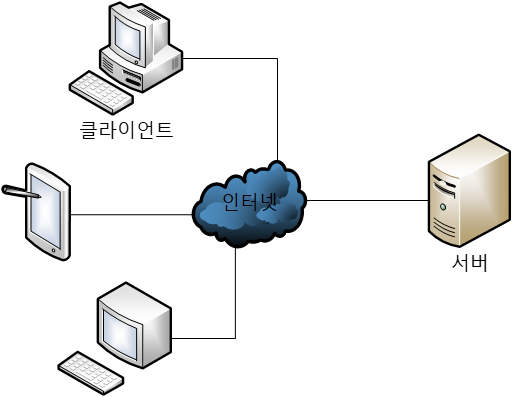

**클라이언트-서버 모델**  
+ 서버는 클라이언트의 요청을 받아 처리하고 응답을 전송하는 방식
+ 하나의 서버와 다수의 클라이언트 통신 가능
+ 인터넷에서 사용되는 네트워크 모델
+ 서버
  + 클라이언트의 요청이 접수되면 처리하여 응답을 전송하는 동작
  + 클라이언트와 통신을 위해 서버 소켓(server socket)을 사용
  + 소켓의 식별: (하드웨어 주소 + 프로세스 식별 포트번호)

+ 클라이언트
  + 클라이언트(client) 소켓을 사용하여 서버와 연결(서버의 주소를 알고 있어야 함)
  + 데이터 송수신(요청 송신과 응답 수신)

**클라이언트-서버 네트워크 프로그래밍**  
+ TCP/IP 프로토콜의 네트워크 접근 계층, 네트워크 계층, 전송 계층은 운영 체제 속에 포함되어 있음
+ 사용자 프로그램은 전송 계층의 서비스를 받아 동작하는 응용 프로그램이다
+ 전송 계층 서비스는 소켓을 통해 제공된다
+ 전송 계층의 서비스를 받으려면 파이썬 모듈의 API 함수를 이용  

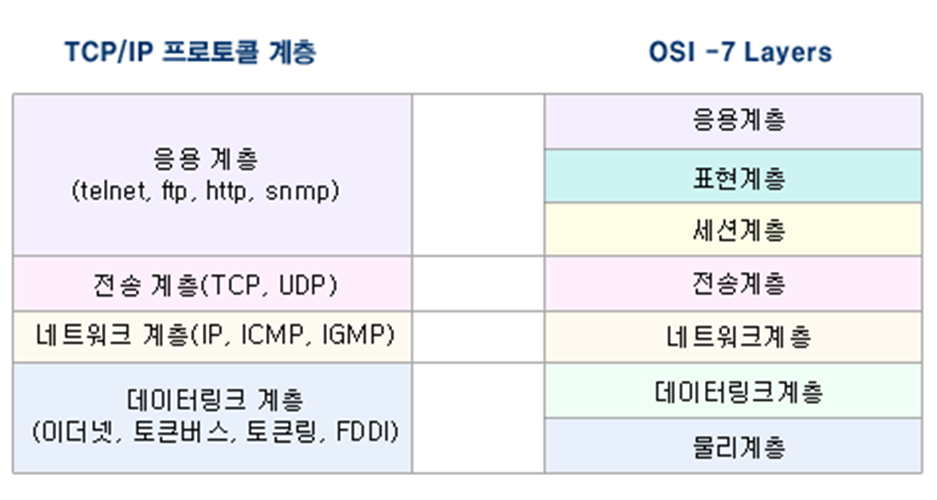
<OSI 7계층 모델과 TCP/IP 프로토콜의 비교>

**응용 프로그램의 식별**
+ 응용 프로그램이 연결된 소켓을 식별하기 위해서는 IP주소와 함께 포트 번호가 필요하다
+ 응용 프로그램과 소켓
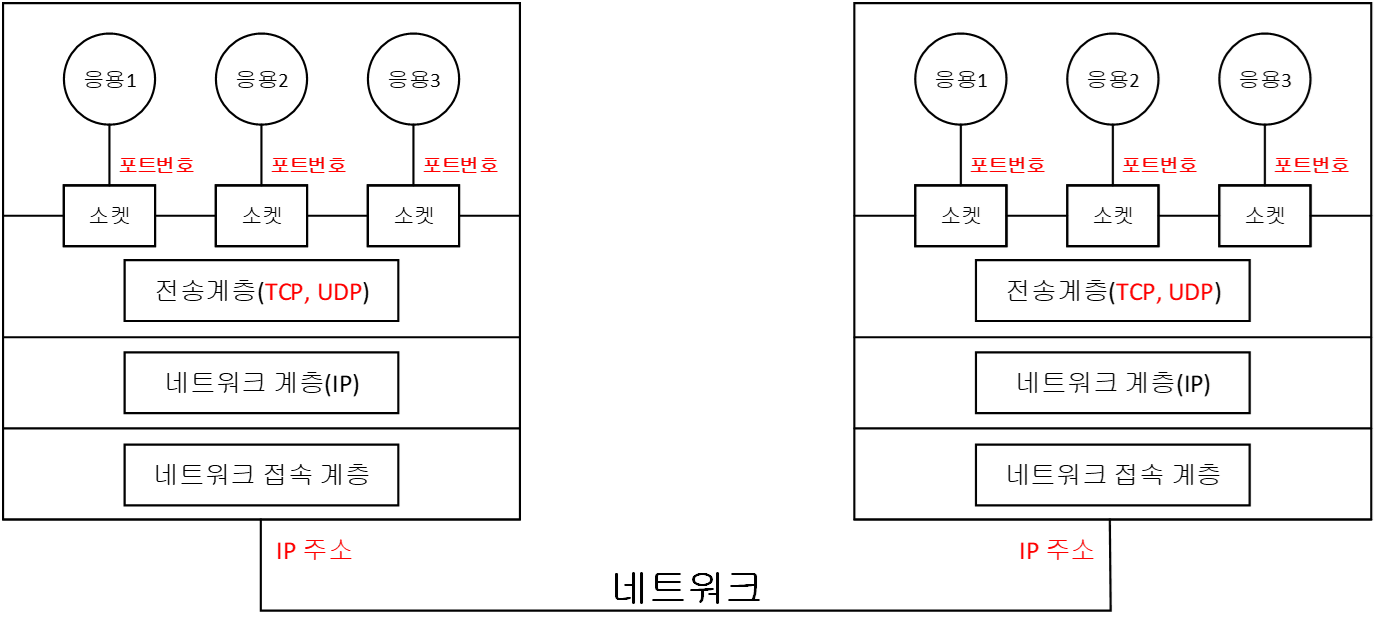

## 소켓 관련 모듈
+ socket 모듈
  + 소켓 프로그램을 작성하기 위한 기본 모듈
  + 동기식 I/O 수행
+ asyncio 모듈
  + 코루틴(coroutine)과 이벤트 루프를 사용하여 비동기식 I/O 수행
  + 코루틴이란?
    + 이벤트 루프에 의해 실행되는 함수
+ select 모듈
  + 소켓 중에서 읽기, 쓰기, 오류 이벤트가 발생한 소켓을 알려줌
  + 소켓 목록을 조사하여 나중에 비동기식으로 처리할 수 있다
  + socket 모듈과 함께 사용

+ selectors 모듈
  + socket 모듈과 함께 비동기 프로그래밍을 위해 사용
  + 이벤트 구동 방식: 이벤트와 콜백을 등록하고 이벤트가 발생하면 콜백 함수 실행

+ socketserver 모듈
  + 서버 프로그램을 쉽게 작성할 수 있는 모듈
  + 데이터가 수신되면 실행되는 handle() 함수를 정의하여 서버 구현

+ twisted 모듈
  + 표준 모듈은 아니지만 이벤트 구동 방식의 3rd Party 모듈


# socket 모듈
+ 소켓을 생성하고 연결 설정, 데이터 송수신, 연결 해제 등의 기능을 수행하는 모듈
+ socket 모듈의 socket 클래스를 이용하여 소켓 객체 생성
```
import socket
sock = socket.socket(family, type, proto=0) #socket 객체
```
  + family: 소켓의 주소 유형(네트워크 계층), 기본: AF_INET
  + type: 소켓 유형(전송 계층 프로토콜 지정),
    + SOCK_STREAM: TCP 프로토콜 사용, 연결 위주 전송
	+ SOCK_DGRAM: UDP 프로토콜 사용, 비연결 전송
  + proto: 항상 0으로 사용

In [ ]:
import socket
socket.socket(socket.AF_INET, socket.SOCK_STREAM)

In [ ]:
socket.socket(socket.AF_INET, socket.SOCK_DGRAM)

## socket 클래스 메서드
+ 서버 소켓에서 사용하는 연결 메서드
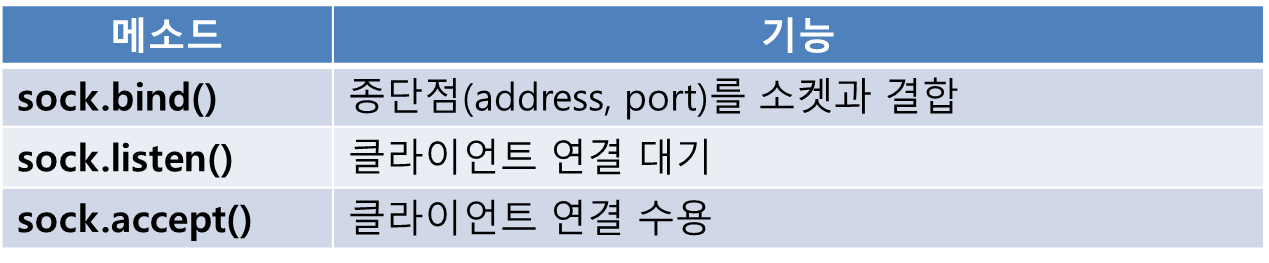
+ 클라이언트 연결 메서드
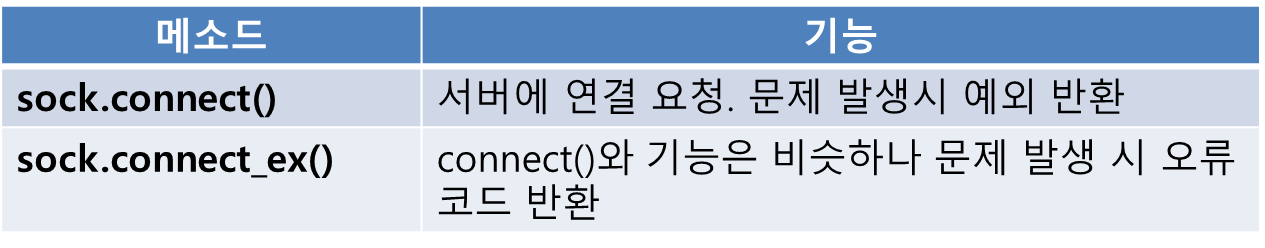

+ 데이터 송수신 메서드
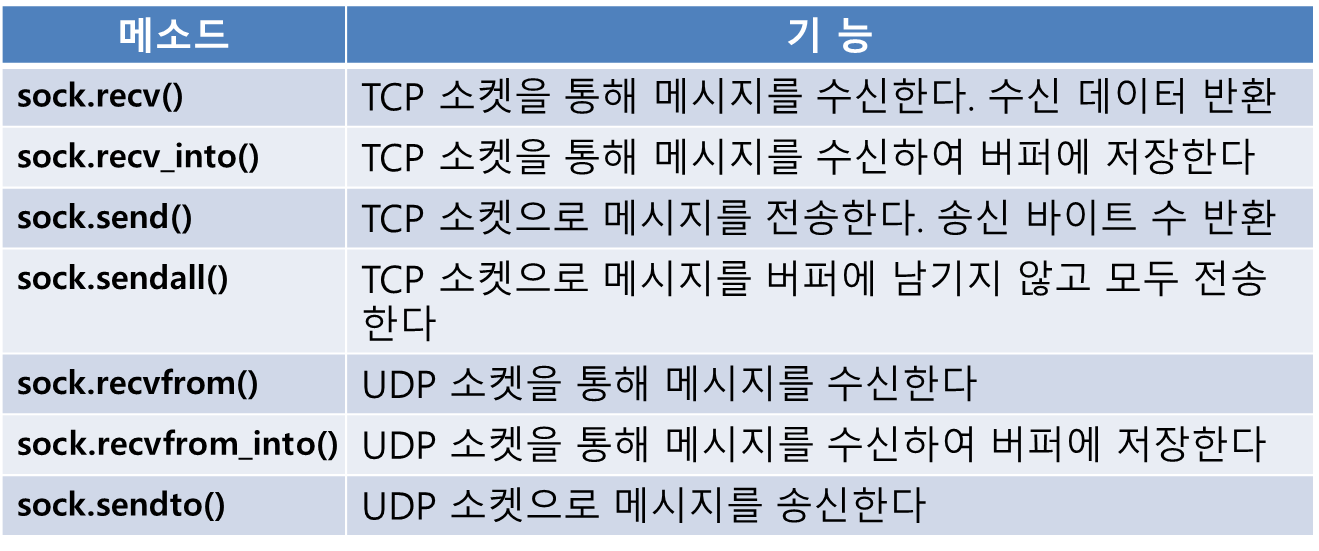

+ 기타 연결 종료, 타임 아웃, 동작 모드 설정을 위한 메서드
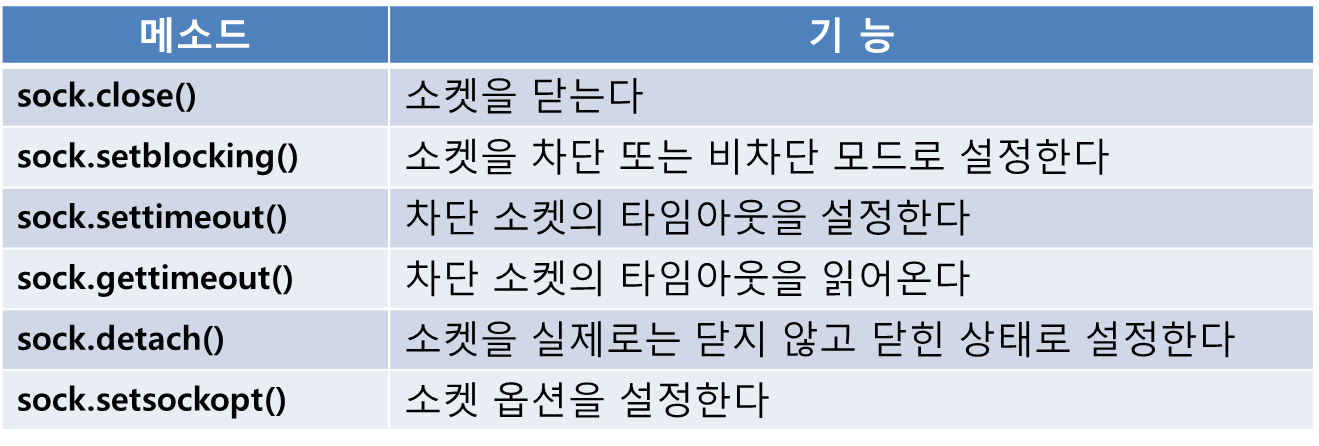

# TCP 소켓 프로그래밍
## TCP 소켓 프로그래밍 순서

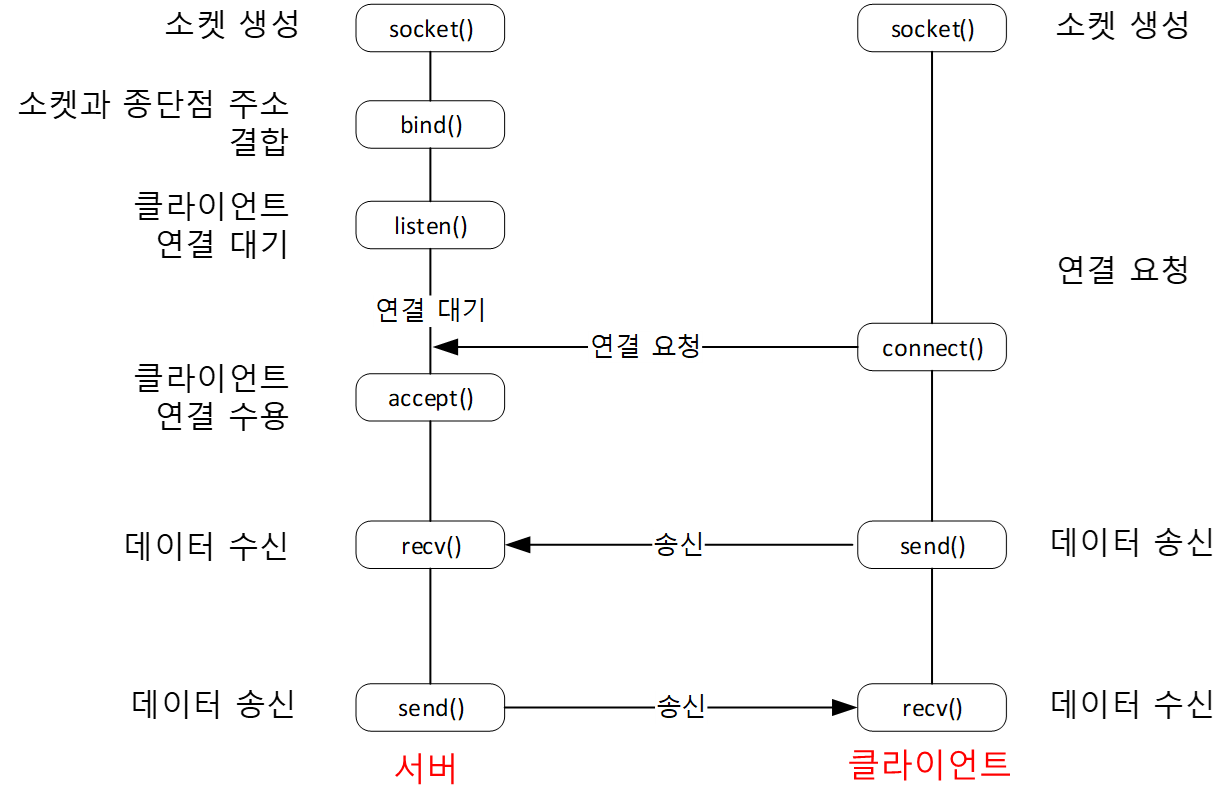

### time 서버 프로그램
클라이언트가 접속하면 현재 시간을 전송하는 서버 프로그램(time_server.py)  
(1) TCP 소켓 생성
```
import socket ➊ socket 모듈을 불러온다
import time
s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)➋TCP 소켓 생성
```
(2) 소켓에 IP 주소와 포트 결합  
* 소켓은 반드시 (addr, port) 튜플로 표시  
```
address = ('', 5000) #''=서버의 임의 주소, 포트 번호=5000
s.bind(address) ➌ 소켓과 주소 결합
s.listen(5) ➍ 연결 대기. 5개까지 동시 수용
```

(3) 클라이언트 연결 대기
```
s.listen(5)
```

(4) 연결 요청을 수락하고 데이터 송신  
* 클라이언트가 연결요청하면 accept() 함수는 클라이언트 소켓과 클라이언트 주소를 반환  
* 데이터 송수신은 반환받은 클라이언트 소켓을 통해 이루어진다  
* send(message) 함수로 데이터를 전송할 때 반드시 바이트형 message여야 한다  
* 전송 후에는 소켓을 닫는다  
```
while True:
    client, addr = s.accept() ➎ 연결 허용. (client socket, rem_addr) 반환
    print(“Connection requested from ”, addr)
    client.send(time.ctime(time.time()).encode()) ➏ 현재 시간을 전송
    client.close() ➐ 소켓 종료
```

In [ ]:
# time_server.py
import socket
import time

s = socket.socket(socket.AF_INET, socket.SOCK_STREAM) #소켓 생성
address = ("localhost", 5000)#소켓 주소 
s.bind(address)#소켓과 주소 결합
s.listen(5)#연결 대기
print("클라이언트 연결 대기...")

while True:
    client, addr = s.accept() #연결 요청 수용
    print("Connection requested from ", addr)
    client.send(time.ctime(time.time()).encode()) #현재 시각을 전송
    client.close() #연결 해제

time_server.py를 실행하고 콘솔창에서 "C:>telnet localhost 5000" 실행

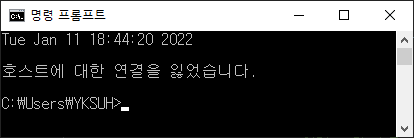

[연습문제 11-1]  
  time.asctime()은 현재 시각을 반환하는 함수이다. 이 함수를 이용하여 현재 시각을 전송하도록 서버 프로그램을 수정하라

### time 클라이언트 프로그램

타임 서버에 접속하여 시간을 읽어 오는 클라이언트 프로그램

+ 서버에 연결하기  
```
sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
address = (“localhost”, 5000)
sock.connect((address)) ➌ 서버에 연결
```
+ 메시지 수신하기  
```
sock.recv(1024) ➍ 수신 바이트를 문자열로 변환하여 출력
```

In [ ]:
# time_client.py
import socket

s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
s.connect(('localhost', 5000))
print("현재 시각: ", s.recv(1024).decode())
s.close()

[실행 방법]  
VS Code에서 time_server.py를 먼저 실행하고 time 클라이언트를 실행한다

[연습문제 11-2]  
친구와 짝을 지어 한 친구는 서버 프로그램을 실행하고 다른 사람은 클라이언트를 실행해 보자.  
클라이언트에서는 서버의 IP 주소를 확인하여 프로그램을 수정해야 한다

[연습문제 11-3], ex_11.3_telnet_client.py  
telnetlib모듈은 인터넷의 텔넷 서비스를 구현할 수 있는 모듈이다. 
telnetlib 모듈을 이용하여 time 클라이언트를 구현해보자

[연습문제 11-4], ex_11.4_time_client.py  
서버에서 수신한 현재 시각을 "2022 Feb 2 (Wed) 14:24:35"의 형태로 변환하여
출력하도록 클라이언트 프로그램을 수정하시오. 
수신된 시각을 출력해보고 각 요소를 어떻게 재배치할지 생각해 보세요 

## TCP 에코 프로그램
### TCP 서버 프로그램

수신 데이터를 출력하고 다시 상대방에게 그대로 전송하는 프로그램
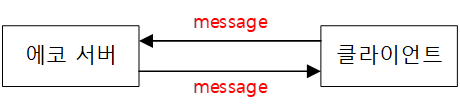

recv() 함수로 데이터를 수신했을 때 함수가 반환은 되지만 수신 데이터가 없으면 연결이 끊어진 것이다  
```
data = client.recv(1024) #최대 1024 바이트 수신
if not data: #수신 데이터 없음
    break # 연결 종료
```

In [ ]:
# TCP_echoserver_demo.py
# TCP 에코 서버
# 1명의 클라이언트만 서비스한다

from socket import *

port = 2500
BUFSIZE = 1024

sock = socket(AF_INET, SOCK_STREAM)
sock.bind(('', port)) #모든 주소를 받아들임
sock.listen(1) #최대 대기 틀라이언트 수
print("Waiting for clients...")

In [ ]:
#클라이언트의 연결 요청을 받는다
c_sock, (r_host, r_port) = sock.accept()
print('connected by', r_host, r_port)

In [ ]:
while True:
    #상대방 메시지 수신
    data = c_sock.recv(BUFSIZE) #accept()로 반환받은 소켓 사용
    if not data: #연결이 종료되었으면
        break
    print("Received message: ", data.decode())
    
    #수신 메시지를 다시 전송
    c_sock.send(data)

c_sock.close()

### TCP 클라이언트

서버에 연결하여 메시지를 전송하고, 수신 메시지를 출력하는 클라이언트 프로그램


In [ ]:
# TCP_client_demo.py
# 간단한 TCP 클라이언트 프로그램

import socket

port = 2500
address = ("localhost", port)
BUFSIZE = 1024

In [ ]:
# 클라이언트 소켓 생성
s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)

In [ ]:
# 서버와 연결
s.connect(address)
print("Connected")

* 송신 메시지는 바이트형이어야 하므로 encode()함수를 사용하여 바이트형으로 변환해야 한다  
```
s.send(msg.encode()) #send a message to server
```

* 수신 메시지를 출력하려면 decode() 함수를 사용하여 문자열로 변환해야 한다
```
r_msg.decode()
```

In [ ]:
while True:
    msg = input("Message to send: ")
    s.send(msg.encode()) #send a message to server
    r_msg = s.recv(BUFSIZE) #receive message from server

    # 입력 메시지가 없으면 종료한다
    if not r_msg: # 프로그램을 종료하려면 입력없이 Enter
        break
    
    #바이트를 문자열로 변환하여 출력
    print("Received message: %s" %r_msg.decode()) 

[실행 방법]  
VS Code에서 서버 프로그램을 먼저 실행하고 노트북에서 클라이언트를 실행한다

[연습문제 11-5]  
클라이언트를 강제로 종료하면 서버에서 예외가 발생한다. 클라이언트 메시지가 'n'이면 소켓을 닫는 코드를 추가하고 소켓을 닫고 종료했을 때 서버의 반응을 확인해 보자. 서버가 이렇게 반응하는 이유는?

### 서버와 클라이언트의 예외처리

+ 상대방과 연결이 끊어졌을 때 send()/recv()를 호출하면 예외가 발생하여 프로그램이 중단된다
+ 정상적인 프로그램 실행을 위해 예외 처리 필요
```
while True:
    #수신할 때 예외 발생 처리
    try:
	    data = conn.recv(BUFSIZE)
    # 예외가 발생하면 소켓을 닫고 프로그램을 종료한다
    except:
	    conn.close() 
	    break
    #정상 처리
    else:
	    print(data.decode())
        
    # 송신할 때 예외 발생 처리
    try:
	    conn.send(data)
    #예외가 발생하면 종료한다
    except:
	    conn.close() 
	    break
```

예외 처리 에코 서버(TCP_echoserver.py)

In [ ]:
#TCP_echoserver.py
# 송수신 예외 처리를 한 에코 서버 프로그램

from socket import *

port = 2500
BUFSIZE = 1024

sock = socket(AF_INET, SOCK_STREAM)
sock.bind(('', port))
sock.listen(5) #최대 대기 클라이언트 수
print("Waiting for clients...")

In [ ]:
c_sock, (r_host, r_port) = sock.accept()
print('connected by', r_host, r_port)
while True:
    # 수신 예외 처리
    try:
        data = c_sock.recv(BUFSIZE)
        if not data: #연결 해제됨
            c_sock.close()
            print('연결이 정상적으로 종료되었습니다')
            break
    except:
        print("연결이 강제로 종료되었습니다")
        c_sock.close() #소켓을 닫는다
        break #무한 루프 종료
    else:
        print(data.decode())
        
    # 송신 예외 처리
    try:
        c_sock.send(data)
    except: #연결 종료로 인한 예외 발생
        print("연결이 종료되었습니다")
        c_sock.close() #소켓을 닫는다
        break #무한 루프 종료

예외 처리 클라이언트(TCP_client.py)

In [ ]:
# 에외처리를 한 TCP 클라이언트 프로그램
# 실행할 때 서버 주소와 포트를 지정한다.
# 지정하지 않으면 '127.0.0.1'과 2500 사용

import socket

sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)

#서버 주소 입력
svrIP = input(("Server IP(default: 127.0.0.1): "))
if svrIP == '':
    svrIP = '127.0.0.1' #기본 주소
    
#포트 번호 입력
port = input('port(default: 2500): ')
if port == '':
    port = 2500 #기본 포트
else:
    port = int(port) 

In [ ]:
sock.connect((svrIP, port))
print('Connected to ' + svrIP)

while True:
    msg = input("Sending message: ")
    #'q'를 입력하면 프로그램 종료
    if msg == 'q':
        break
    
    #송신 데이터가 없으면 다시 진행
    if not msg:
        continue
    
    # 데이터 송신 예외 처리
    try:
        sock.send(msg.encode()) #메시지 전송
        
    except: #연결이 종료됨
        print("연결이 종료되었습니다")
        break

    # 데이터 수신 예외 처리
    try:
        msg = sock.recv(1024)
        # 연결이 정상 종료됨
        if not msg:
            print("연결이 종료되었습니다")
            break
        # 데이터 수신
        print(f'Received message: {msg.decode()}')

    except: #연결이 강제 종료됨
        print("연결이 종료되었습니다")
        break

sock.close()

### create_connection()을 이용한 클라이언트

create_connection((server_addr, port)) 함수는 서버와 연결하고 소켓을 반환한다

In [ ]:
#TCP_client_easy.py
#create_connection()을 이용한 TCP 클라이언트 프로그램

import socket

# TCP 소켓 생성과 연결
sock =socket.create_connection(('localhost',2500 ))

# 메시지 전송
message ="클라이언트 메시지"
print('sending: {}'.format (message))
sock.sendall(message.encode())

data =sock.recv(1024) #데이터 수신
print('received: {}'.format (data.decode()))
print('closing socket')
sock .close () #연결 종료

## 요청 처리 TCP 서버 프로그램

클라이언트로부터 1~10까지의 숫자를 받으면 영어를 전송하는 서버 프로그램(TCP_Process_Server.py)
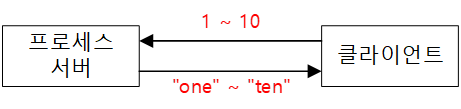

In [ ]:
#TCP 프로세싱 서버 프로그램
#숫자를 받아 영어를 송신한다

import socket

#숫자에 대한 영어 사전
table = {'1':'one', '2': 'two', '3': 'three', '4': 'four',\
'5':'five', '6': 'six', '7': 'seven', '8': 'eight',\
'9': 'nine', '10': 'ten'}

# 서버 소켓을 생성하고 연결을 기다린다
s=socket.socket() #AF_INET, SOCK_STREAM
address = ("", 2500)
s.bind(address)
s.listen(1)
print('Waiting...')

#클라이언트 연결 수락
c_socket, c_addr = s.accept()
print("Connection from ", c_addr)

In [ ]:
#메시지 처리
while True:
    data = c_socket.recv(1024).decode() #요청 수신
    try:
        resp = table[data] #데이터를 key로 사용하여 value를 가져온다
    except:
        c_socket.send('Try again'.encode()) #오류가 있을 때 
    else:
        c_socket.send(resp.encode()) #변환 값을 전송

[실행 방법]  
서버를 먼저 실행하고 VS Code에서 TCP_client.py를 실행한다

[연습문제 11-6], sol_p204.py  
다음과 같은 이름과 학번 테이블을 이용하여 이름을 수신하면 학번을 전송하는 서버 프로그램을 작성하시오
```
table ={'홍길동': '20150001', '심순애': '20150002', '박문수': '20150003'}
```
클라이언트에서 이름을 잘못 입력한 경우, '이름이 없습니다'라는 메시지를 클라이언트로 전송한다.

## 사용자 모듈을 이용한 TCP 서버 프로그램

소켓 생성과 연결을 모듈로 구현해 두면 프로그램이 쉬워진다
* 사용자 모듈을 작성하고 MyTCPServer.py로 저장

### 사용자 모듈

In [ ]:
# TCP 서버 프로그램 작성을 위한 사용자 모듈(MyTCPServer.py)

class TCPServer:
    # TCP 소켓을 생성하고 연결 대기
    def __init__(self, port):
        import socket
        self.sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
        self.sock.bind(('', port)) #소켓과 주소의 결합
        self.sock.listen(1) #연결 대기
        self.connected = False
        
    # 소켓을 닫는다
    def disconnect(self):
        self.connected = False
        self.c_sock.close()
    
    #클라이언트 연결 요청 수락
    def accept(self): #연결 수락
        self.c_sock, self.c_addr = self.sock.accept()
        self.connected = True
        return self.c_sock, self.c_addr

    # 메시지 전송
    def send(self, msg):
        if self.connected:
            self.message = msg
            self.c_sock.send(self.message.encode())
            return True
        else:
            return False
        
    # 메시지 수신
    def receive(self, r_sock=None):
        if not r_sock:
            r_sock = self.c_sock
        try:
            data = r_sock.recv(1024)
            if not data:
                self.disconect()
                return None
            return data.decode()
        except:
            self.disconnect()
            return None

### 사용자 모듈을 이용한 TCP 서버 프로그램

In [ ]:
#MyTCPServer_ex01.py
#사용자 정의 모듈을 이용한 에코 서버 프로그램

import MyTCPServer as ms#사용자 정의 모듈을 불러온다

server = ms.TCPServer(2500)
print("Waiting for connection")

while True:
    #미연결 상태이면 연결 수락
    if not server.connected:
        server.accept()
        
    # 연결 상태이면 메시지를 수신하여 출력하고 다시 전송한다
    else:
        msg = server.receive()
        # 연결이 되어 있지 않으면 None이 반환됨
        if msg:
            print('수신메시지: ', msg)
            server.send(msg)
        else:
            print("Disconnected")
            break
server.disconnect()

[실행 방법]  
VS Code에서 MyTCPServer_ex01.py를 먼저 실행하고 TCP_client.py를 실행한다

## TCP 소켓을 이용한 파일 송수신

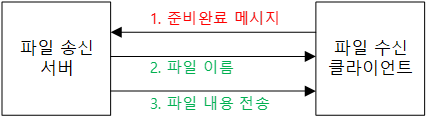

### 파일 송신 프로그램  

(1) TCP 소켓을 생성하고 클라이언트로부터 준비완료 메시지를 받는다  
```
msg = c_sock.recv(1024) #클라이언트로부터 준비 완료 수신
print(msg.decode())
```
(2) 전송파일 이름 전송하기
```
c_sock.sendall(filename.encode()) #파일 이름 전송

```
(3) 파일 열고 내용 송신하기  
* with open() as 문으로 파일을 오픈하면 파일을 종료할 필요가 없다.  
* sendfile() 메소드를 사용하면 한 번에 전송 가능
```
with open(filename, 'rb') as f: #바이너리 읽기 모드로 열기
   c_sock.sendfile(f,0) #파일 전송, 0=offset
```

 또는 데이터를 한 줄씩 읽어 전송
```
data = f.read()
while data:
    c-sock.send(data)
    data = f.read()
```


In [ ]:
# TCP_sendfile.py
# 파일 전송 프로그램

import socket

port = 2500
s_sock = socket.socket()
host = ""
s_sock.bind((host, port))
s_sock.listen(1)

print('Waiting for connection....')

c_sock, addr = s_sock.accept() #클라이언트와 연결
print('Connected from', addr)

In [ ]:
# 상대방의 준비완료를 기다린다
msg = c_sock.recv(1024) #클라이언트로부터 준비 완료 수신
print(msg.decode())

In [ ]:
#경로를 포함한 파일 이름을 입력받아 파일 이름만 축출
filename = input('File name to send(c:/test/sample.bin): ') #'\'대신 '/' 사용하여 경로 구분
print(f"Sending '{filename}'")
c_sock.sendall(filename.encode()) #파일 이름 전송

In [ ]:
#파일을 읽기 모드로 열고 sendfile() 함수로 파일 내용 전송
with open(filename, 'rb') as f:
    c_sock.sendfile(f,0) #파일 내용 전송
    
    #파일 내용을 읽어 read() 함수로 전송할 수도 있다
    #data = f.read()
    #while data:
    #    c_sock.sendall(data)
    #    data = f.read()
    
print('Sending complete')
c_sock.close()

### 파일 수신 프로그램  
+ 소켓을 생성하여 서버로 접속하고 준비완료 메시지를 전송한다
+ 파일 이름을 받아 바이너리 쓰기 모드로 파일 오픈
```
fn = s_sock.recv(1024).decode() #파일 이름 수신
with open('new_'+fn, 'wb') as f: #쓰기 모드로 수신 파일 열기
```
+ 일정한 크기로 파일 내용을 받아 파일에 저장
```
print('receiving file...')
while True:
    data = s_sock.recv(8192)
    if not data: #더 이상 내용이 없으면 루프를 빠져나간다
        break
    f.write(data)
```

In [3]:
#TCP_receivefile.py
# 파일 수신 프로그램

import socket, os

s_sock = socket.socket()
host = "localhost"
port = 2500

s_sock.connect((host, port)) #서버와 연결

#준비완료 메시지 송신
s_sock.send("I am ready".encode()) #준비 완료 메시지 송신

10

In [4]:
# 파일 이름 수신
fn = s_sock.recv(1024).decode() # 경로를 포함한 파일이름 수신
filename = os.path.basename(fn) # 기본 파일이름 추출

# 파일을 생성하고 수신 내용을 저장한다
# 필요하면 파일 경로를 수정한다
with open('d:/'+filename, 'wb') as f: #저장 파일 열기
    print('file opened')
    print('receiving file...')
    while True:
        data = s_sock.recv(8192) #파일 내용 수신
        if not data: #내용이 없으면 종료
            break
        f.write(data)#내용을 파일에 쓰기

print('Download complete')
s_sock.close()
print('Connection closed')

file opened
receiving file...
Download complete
Connection closed


[실행 방법]  
VS Code에서 TCP_sendfile.py를 먼저 실행하고, TCP_receivefile.py를 실행한다. 서버에서 "Lenna.png"를 전송하면 수신 프로그램 실행 컴퓨터의 "c:\"에 수신 파일이 저장되는지 확인한다.  
두 사람이 역할을 나누어 프로그램을 실행해 보자

## TCP 소켓을 이용한 동영상 송수신 프로그램
### 동영상 송신 프로그램

+ 웹카메라의 동영상을 TCP 소켓을 이용하여 실시간으로 송수신하는 프로그램
+ 프로그램을 위해 OpenCV와 imutils 모듈을 이용한다.  
  C:>pip install –U —user opencv-python imutils  
+ 동영상은 프레임 단위로 전송되고 프레임 구성은 다음과 같다  
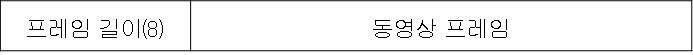

+ 웹카메라 동영상 획득  
  cv2.VideoCapture(0)  
+ 프레임의 해상도 수정  
  imutils.resize(frame, width)  
+ 프레임 길이는 비번호 8바이트로 변환
  struct.pack(‘Q’, len(frame_bytes))  
  'Q’는 객체를 비번호(unsigned) 8바이트로 변환하는 변환 지정 문자  
+ 프레임을 바이트 스트림으로 변환하여 전송  
  pickle.dumps()  

서버 프로그램에서 동영상 획득을 위해 웹카메라를 USB 포트에 연결해야 한다

In [ ]:
#video_server.py
# Video server
# Capturing a video stream from webcam and sending it to client

import socket, cv2, pickle, struct, imutils

# 소켓 생성
server_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
TCP_PORT = 9000
server_addr = ('', TCP_PORT)

# 주소와 포트번호 바인드
server_socket.bind(server_addr)

# 접속 대기
server_socket.listen(5)
print("접속 대기:", server_addr)

In [ ]:
# 클라이언트 연결
while True:
    client_socket, addr = server_socket.accept()
    print(addr, '와 연결됨')
    
    #클라이언트와 연결되면 웹카메라에서 동영상 프레임 획득
    if client_socket:
        vid = cv2.VideoCapture(0) # 동영상 객체 생성. WebCam=0

        while (vid.isOpened()):
            # 프레임 획득
            img, frame = vid.read() 
            # 프레임 크기 조절
            frame = imutils.resize(frame, width=640) 
            # 프레임을 바이트 스트림으로 변환
            frame_bytes = pickle.dumps(frame)
            #프레임 길이와 프레임 데이터를 결합하여 전송 프레임 구성
            # frame 길이(unsigned 8bytes) + frame
            message = struct.pack("Q", len(frame_bytes)) + frame_bytes 
            # [길이 + 프레임] 전송
            client_socket.sendall(message) 

            # 전송 영상 표시
            cv2.imshow('Server Video', frame) 
            # 전송 화면을 닫으면 종료
            key = cv2.waitKey(1) & 0xFF
            if key == ord('q'):
                client_socket.close()

### 동영상 수신 프로그램


수신 프로그램은 메시지(프레임)를 수신하여 프레임 길이 정보(8바이트)를 알아내고 길이 만큼의 데이터를 잘라 화면에 표시하는 동작을 반복한다.

In [ ]:
#video_client.py
# Video client(수신)
import socket,cv2, pickle,struct

# 소켓 생성
client_socket = socket.socket(socket.AF_INET,socket.SOCK_STREAM)
HOST_IP = 'localhost' # 서버 IP 주소
TCP_PORT = 9000

# 서버와 연결
client_socket.connect((HOST_IP,TCP_PORT)) 
#빈 프레임 준비
data = b""
#프레임 길이(8바이트) 저장 변수 준비
payload_size = struct.calcsize("Q") # 길이 정보를 unsigned 8bytes로 표시

+ [길이 + 동영상프레임]을 수신하여 [동영상프레임]이 [길이]보다 큰지 확인 
+ 작으면 [길이]보다 커질 때까지 [동영상프레임]을 계속 수신
+ [동영상프레임]이 [길이]보다 커지면 [동영상프레임]을 [길이]단위로 분할하여 화면에 표시

In [ ]:
while True:
    # 전체 수신 프레임의 길이가 길이 영역(8바이트)보다 커질 때까지
    # 데이터를 계속 읽는다
    while len(data) < payload_size: 
        #최대 4K 데이터 수신
        packet = client_socket.recv(4*1024) # 4K
        if not packet: break # 연결 종료?
        data+=packet
    
    # 프레임 길이 추출
    packed_msg_size = data[:payload_size] 
    # 프레임 추출
    data = data[payload_size:] 
    # 프레임 길이를 파이썬 자료형으로 변환
    msg_size = struct.unpack("Q",packed_msg_size)[0] 
    
    # 길이 만큼의 frame을 계속 수신한다
    while len(data) < msg_size: 
        data += client_socket.recv(4*1024)
    
    # 한 프레임 크기를 잘라낸다
    frame_data = data[:msg_size] 
    # 나머지는 다음 프레임(next frame)
    data  = data[msg_size:] 
    
    # 동영상 프레임 표시
    frame = pickle.loads(frame_data) # 바이트 스트림을 프레임으로 변환
    cv2.imshow("Client Video",frame)
    key = cv2.waitKey(1) & 0xFF
    if key  == ord('q'):
        break
client_socket.close()

[프로그램 실행]  
서버 프로그램(video_server.py)을 먼저 실행하고 클라이언트(video_client.py)를 실행한다. 두 프로그램이 서로 다른 컴퓨터에서 실행되면 클라이언트 프로그램에서 서버 주소를 변경해야 한다.

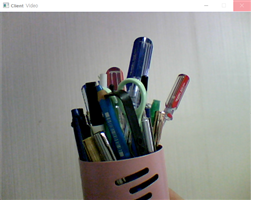

# UDP 소켓 프로그래밍

+ 편지를 이용한 통신과 유사
+ 연결이 없다
+ UDP 소켓 유형
  + SOCK_DGRAM
+ 송신: sendto()
+ 수신: recvfrom()

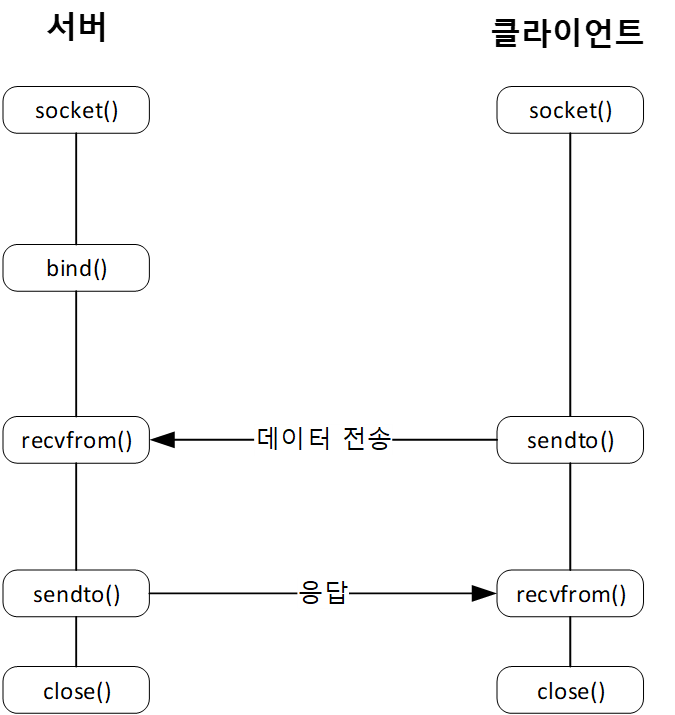

## UDP 에코 서버 프로그램

+ UDP 프로토콜을 사용한 에코 서버 프로그램  
  + 클라이언트의 메시지를 받아 다시 메시지를 전송한다.
  + 연결이 없이 송수신되므로 다수의 사용자와 송수신 가능  
  
+ recvfrom() 함수를 이용하여 데이터 수신
+ 이 함수는 수신 데이터(data)와 상대방 주소(addr)을 반환한다
  + addr에는 ip주소와 port가 포함되어 있다
```
data, addr = sock.recvfrom(maxsize)
```

+ sendto(data,addr) 함수를 이용하여 데이터를 송신
```
sock.sendto(data,addr)
```

In [ ]:
#UDP_server.py
# UDP 에코 서버 프로그램

import socket
port = 2500
maxsize = 1024

#UDP 소켓을 생성하고 주소와 포트 결합
sock = socket.socket(socket.AF_INET,socket.SOCK_DGRAM) #UDP 소켓
sock.bind(('', port))
print("수신 대기 중")

#데이터를 수신하고 다시 전송한다
while True:
    #데이터 수신
    data, addr = sock.recvfrom(maxsize) #데이터와 상대방 종단점 주소 수신
    print("Received message: ", data.decode())
    print(addr)

    #데이터 송신
    sock.sendto(data,addr) #재전송

## UDP 클라이언트 프로그램

서버로 메시지를 송신하고 응답을 수신하는 UDP 클라이언트
+ UDP 프로토콜을 사용하므로 connect()와 같은 연결이 없다  


In [ ]:
#UDP_client.py
# 간단한 UDP 클라이언트 프로그램

import socket
BUFFSIZE = 1024
port = 2500

#UDP 소켓 생성
sock = socket.socket(socket.AF_INET,socket.SOCK_DGRAM)
msg = "Hello UDP server"

#메시지 전송
sock.sendto(msg.encode(),('localhost', port))

#메시지 송수신
while True:
    data, addr = sock.recvfrom(BUFFSIZE)
    print("Server says:", data.decode())
    msg = input('Sending message: ')
    sock.sendto(msg.encode(), addr) #메시지 전송

[실행 방법]  
VS Code에서 UDP_server.py를 먼저 실행하고, UDP_client.py를 실행한다. 

## 전송 손실을 보완한 UDP 프로그램

+ UDP는 데이터 손실 가능
+ 손실에 대비하여 오류 제어기법 필요
+ 정지-대기(stop-wait) 방식
  + 수신 측에서 데이터를 정상적으로 수신하면 ‘ACK’ 응답 보내고 수신하지 않으면 응답을 보내지 않는 방식
  + 송신자는 상대방의 응답이 없으면 응답 대기 시간을 두 배 증가시키고 다시 메시지를 전송

### 전송 손실을 가정한 UDP 서버 프로그램

+ 30%의 전송 손실이 발생하는 것으로 가정하여 서버(수신) 프로그램을 작성  
+ random.randint(1, 10)을 이용하여 랜덤 값이 4보다 작으면 응답을 보내지 않고 4 이상이면 ‘ACK’ 응답을 보낸다.

In [ ]:
#errorcontrol_UDP_server.py
# 전송 손실을 가정한 UDP 서버 프로그램

import random
from socket import *

port = 2500
BUFFER = 1024
s_sock = socket(AF_INET, SOCK_DGRAM)
s_sock.bind(('', port))
print('Waiting...')

while True:
    data, address = s_sock.recvfrom(BUFFER)
    if random.randint(1, 10) < 4: #패킷 손실
        print(f'Packet from {address} lost!!!')
        continue
    print(f'Message is {data.decode()!r} from {address}') #메시지 출력

    s_sock.sendto('ACK'.encode(), address) #ACK 응답 전송

### 오류제어 기능이 포함된 클라이언트 프로그램

+ 클라이언트 프로그램에서는 메시지를 전송하고 settimeout()을 이용하여 0.1초 동안 응답을 기다린다. 
+ 타임아웃 동안 응답이 없으면 대기 시간을 두 배 증가시키고 다시 메시지를 전송한다. 
+ 대기 시간이 2초를 넘거나 ACK 응답이 수신되면 종료한다. 
+ 이 과정을 10번 반복하여 손실률이 30%일 때 데이터 전송이 성공적으로 이루어지는지 확인한다.

In [ ]:
#errorcontrol_UDP_client.py
# 오류제어 기능이 포함된 UDP 클라이언트 프로그램

from socket import *

port = 2500
BUFFER = 1024
server = "localhost"
c_sock = socket(AF_INET, SOCK_DGRAM)

#UDP 소켓이라도 connect()로 연결하면 send()/recv() 사용 가능
c_sock.connect((server, port))

In [ ]:
#데이터를 송신하고 응답을 받는 동작을 최대 10번 시도
for i in range(10): 
    delay = 0.1  #0.1초부터 지연 시작
    data = 'Hello message'

    while True:
        #데이터를 송신하고 타임아웃을 설정한다
        c_sock.send(data.encode())
        print(f'Waiting up to {delay} seconds for a reply')
        c_sock.settimeout(delay) #타임아웃 설정
        
        #타임아웃 이내에 데이터가 수신되지 않으면 대기 시간을 2배 증가
        try:
            data = c_sock.recv(BUFFER) #데이터 수신
        except timeout: #타임아웃 발생
            delay *= 2  #대기 시간 2배 증가
            if delay > 2.0: #시간 초과
                print('The server seems to be down')
                break 
        #타임아웃 이전에 데이터가 수신되면 출력
        else:
            print('Response: ', data.decode())
            break #종료

[실습 방법]  
errocontrol_UDP_server.py를 먼저 실행하고, errocontrol_UDP_client.py를 실행한다. 클라이언트의 평균 수신 시간을 확인해 보자.  
서버의 오류 확률을 증가시켰을 때 클라이언트의 평균 수신 시간이 어떻게 변하는지 확인해 보자

## UDP 소켓을 이용한 파일 송수신

UDP 소켓을 이용하여 파일을 송수신하는 프로그램  

+ 's' 인자와 함께 실행하면 송신 동작을 하고, ‘r’ 인자와 함께 실행하면 수신 동작
+ 'r' --> Receiver() 함수 호출하여 파일 수신
+ 's' --> Sender() 함수를 호출하여 파일 송신
  + 파일 이름을 전송하고 'ok'를 수신하면 파일 내용 전송

In [ ]:
#UDP_file_sr.py
#UDP 소켓을 이용한 파일 송수신 프로그램
#수신을 먼저 실행하고 송신한다

import socket, time, sys

BUFSIZE = 1024*8

In [ ]:
#파일 수신 함수
def Receiver():
    sock.bind(addr)
    print("수신 대기 중...")
    
    #파일 이름을 수신하고 'ok' 메시지 송신
    file_name, client = sock.recvfrom(BUFSIZE) #파일 이름 수신
    sock.sendto('ok'.encode(), client) #응답
    
    #파일을 열고 수신 내용을 파일에 넣는다
    with open('d:/'+file_name.decode(), "wb") as fp:
        print("파일 수신 중...")
        #수신 내용이 없을 때까지 계속 수신하여 저장
        while True:
            data = sock.recvfrom(BUFSIZE)
            if not data[0]: #수신 완료
                break
            fp.write(data[0]) #수신 데이터를 파일에 저장
    
    print("수신 완료")

In [ ]:
#파일 송신 함수
def Sender():
    #파일 이름을 송신하고 'ok' 응답을 기다린다
    file_name = input("File name to send: ")
    sock.sendto(file_name.encode(), addr) #파일 이름 전송
    resp, client = sock.recvfrom(BUFSIZE) #응답 수신
    
    #'ok'가 수신되면 파일 내용 전송
    if resp.decode().lower() == 'ok':
        fp = open(file_name, "rb")
        data = fp.read(BUFSIZE)
        print("송신 중...")
    
        
        #파일을 읽어 내용 전송
        while(data):
            sock.sendto(data, client)
            time.sleep(0.02) #수신측에서 저장할 때까지 잠시 대기
            data = fp.read(BUFSIZE)
            
        #송신 완료를 위해 빈 데이터 전송
        sock.sendto(data, client) 
        fp.close()
        print("전송 완료")
        
    #'ok' 응답이 없으면 오류
    else:
        print("수신 응답 오류")

In [ ]:
if __name__ == "__main__":
    sock = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)
    addr = ('localhost', 2500)
    
    #옵션에 따라 송신 또는 수신 동작
    try:
        role = sys.argv[1] #송신(s) 또는 수신(r)
        if role == 's':
            Sender()
        elif role == 'r':
            Receiver()
        else:
            print("s(송신) 또는 r(수신)을 지정하세요")
    except:
        print("s(송신) 또는 r(수신)을 지정하세요")

[실행 방법]  
VS Code 터미널에서 "python UDP_file_sr.py r"을 실행하고, 다른 터미널 창에서 "python UDP_file_sr.py s"을 실행한다. 송신 터미널에서 전송할 파일 이름(Lenna.png)을 입력하고, "d:\"에 파일이 수신이 제대로 되는지 확인한다. d:\가 없으면 다른 폴더를 지정한다

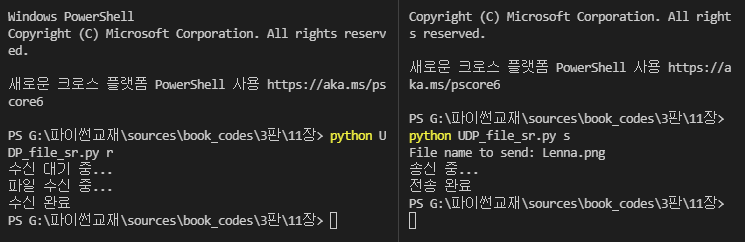

[연습문제 11-7]  
수신 측에서 파일을 받아 저장할 여유를 주지 않고 데이터를 송신하면 오류가 발생할 수 있다. 예제 프로그램에서는 라인 36에서 time.sleep(0.02)을 호출하여 시간 여유를 두고 데이터를 전송한다. 수신 측에서 데이터를 받을 수 있는 경우에만 송신하면 이러한 문제를 방지할 수 있다. 이러한 기능을 흐름 제어(flow control)라고 한다. 가장 기본적인 흐름 제어는 수신 측으로부터 긍정 응답(‘ACK’)을 받은 후에 다음 데이터를 송신하는 것이다. 송신 측에서는 데이터를 보낸 다음, ‘ACK’를 수신한 경우에만 다음 데이터를 보내고, 수신 측에서는 수신 데이터를 저장한 다음에 ‘ACK’를 전송하도록 프로그램을 수정하시오.

## UDP 소켓을 이용한 동영상 송수신 프로그램

UDP 소켓을 이용하여 클라이언트에서 웹카메라 영상을 서버로 전송하고, 서버에서 수신 동영상을 표시하고 MP4 형식으로 저장  

### UDP 동영상 클라이언트(송신) 프로그램

+ 컬러 동영상(640 x 480)은 고정길이 프레임 단위로 전송
+ 프레임 픽셀 수 = 640 x 480 x 3
+ 640 x 480 x 3 = 46080 x 20이므로 프레임 픽셀을 46080 바이트씩 20개로 나누어 전송

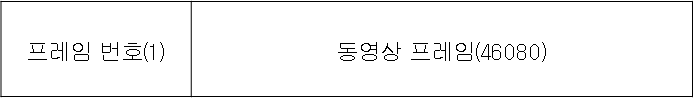
+ 웹카메라에서 읽은 3차원 데이터를 1차원으로 평탄화하고 바이트형으로 변환하여 전송
```
cap = cv2.VideoCapture(0)
ret, frame = cap.read()
one_d_frame = frame.flatten() #평탄화
send_frame = one_d_frame.tobytes() #바이트형으로 변환
#i=프레임 번호, fSize=46080(프레임 크기)
sock.sendto(bytes([i])+send_frame[i*fSize:(i+1)*fSize],(UDP_IP, UDP_PORT))
```

In [ ]:
#video_UDP_client.py
import socket
import cv2

UDP_IP = 'localhost'
UDP_PORT = 9000

sock = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)

# WebCam 객체 생성
cap = cv2.VideoCapture(0)
#프레임 길이
fSize = 46080

In [ ]:
#프레임을 읽어 화면에 표시하고, 
#1차원으로 변환하여 46080 바이트씩 전송
while cap.isOpened():
    # Video frame을 읽어 화면에 표시한다
    ret, frame = cap.read()
    cv2.imshow("Client Frame", frame)
    #화면을 닫으면 종료
    if cv2.waitKey(1) & 0xFF == ord('q'):
        sock.close()
        cap.release()
        break

    # frame을 1차원으로 변환
    one_d_frame = frame.flatten()
    #1차원 프레임을 바이트형으로 변환
    send_frame = one_d_frame.tobytes()

    # 프레임을 46080 바이트씩 전송. 프레임 번호를 헤더로 사용
    for i in range(20):
        sock.sendto(bytes([i]) + send_frame[i*fSize:(i+1)*fSize], (UDP_IP, UDP_PORT))

### 동영상 수신(서버) 프로그램

+ 동영상 프레임을 저장할 46080 x 20 버퍼 생성
```
buffer = [b'\xff' * 46080 for x in range(20)]
```
+ MPEG4 동영상 파일을 위한 코덱과 압축 방식을 가져와서 동영상을 파일로 저장할 VideoWriter 객체를 생성
```
fourcc = cv2.VideoWriter_fourcc(*'XVID') # XVID MPEG-4 코덱
out = cv2.VideoWriter('output.mp4', fourcc, 25.0, (640,480))
```
+ 20개의 프레임이 모두 수신되면 프레임을 모두 더한 후, numpy 모듈을 이용하여 바이트형 데이터를 정수형으로 변환하고 평탄화된 데이터를 다시 원래대로 640 x 480 x 3 포맷으로 복원한다.
```
frame = numpy.frombuffer(picture, dtype=numpy.uint8)
# 640 x 480 x 3으로 변환
frame = frame.reshape(480, 640, 3)

+ 변환된 데이터는 화면에 표시하고 MP4 파일로 저장된다.
```
out.write(frame) 
```

In [ ]:
#video_UDP_server.py
import socket
import numpy
import cv2

UDP_IP = ""
UDP_PORT = 9000

sock = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)
sock.bind((UDP_IP, UDP_PORT))

In [ ]:
# 640 x 480 칼라 프레임 저장 버퍼
# 640 x 480 x 3 = 46080 x 20
buffer = [b'\xff' * 46080 for x in range(20)] 

In [ ]:
# 동영상 파일의 fourcc 값 가져오기(코덱,압축방식,색상,픽셀포멧 등)
# DIVX MPEG-4 코덱('D','I','V','X')
fourcc = cv2.VideoWriter_fourcc(*'XVID') 

#동영상 저장 파일 지정
#VideoWriter(filename, fourcc, fps, frameSize, isColor=None) 객체 생성
out = cv2.VideoWriter('output.mp4', fourcc, 25.0, (640,480))

while True:
    picture = b''

    # 프레임을 수신하여 버퍼에 저장
    data, addr = sock.recvfrom(46081)
    #버퍼에 저장
    # frame(46081) = frame_number(0) + frame_data(46080)
    buffer[data[0]] = data[1:46081] #data[0]=프레임번호

    if data[0] == 19: # 마지막 프레임?
        # 프레임 직렬화
        for i in range(20):
            picture += buffer[i] 

        # 바이트형을 정수 배열로 변환
        #frame = numpy.fromstring(picture, dtype=numpy.uint8)
        frame = numpy.frombuffer(picture, dtype=numpy.uint8)
        
        # 640 x 480 x 3으로 변환
        frame = frame.reshape(480, 640, 3)
        
        # 프레임 표시
        cv2.imshow("Server Frame", frame)
        # frame을 동영상 파일에 저장
        out.write(frame) 

        #동영상 창을 닫으면 종료
        if cv2.waitKey(1) & 0xFF == ord('q'):
            out.release()
            sock.close()
            cv2.destroyAllWindows()
            break

[실행 방법]  
웹카메라를 연결하고 프로그램을 실행해 보자. 서버 프로그램을 먼저 실행하고 클라이언트 프로그램을 실행한다.  
“output.mp4” 파일이 생성되고 이 파일을 클릭하면 저장된 동영상을 볼 수 있다.

# 프레임 작업과 파싱

+ 사이즈가 큰 데이터는 네트워크에서 전송가능한 작은 단위로 분해하여 전송하는데 이를 단편화(segmentation)이라 한다  
+ 수신측에서는 단편화 메시지를 재조립하여 원래대로 복구해야 한다. 이를 재조립(reassembly)라 한다

In [ ]:
#단편화 및 재조립 프로그램
frame=[]
msg = input("Your message: ")
#입력 메시지를 4문자씩 분할
size = 4

#4문자씩 분할하여 프레임 리스트에 저장
for i in range(0, len(msg), size):
    frame.append(msg[i:i+size])

    print('단편화 메시지: {}'.format(frame))
#단편화 메시지를 원래대로 재조립
print('재조립 메시지: {}'.format(''.join(frame)))

## 문자 위주 프레임

단편화된 메시지는 전송과 재조립에 필요한 필드정보를 추가하여 프레임으로 구성한다. 각 필드가 문자로 표시되는 프레임을 문자 위주 프레임(Character Oriented Frame)이라 한다.  
+ 프레임의 구조 예(문자 위주 프레임)  
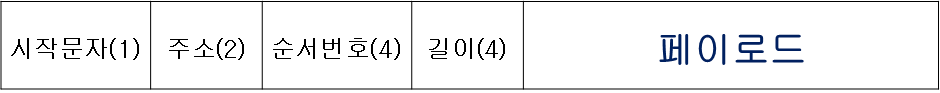

  + 시작문자: 1문자, 프레임을 시작을 나타내는 특수 문자
  + 주소: 2문자, 상대방을 식별하기 위한 정보
  + 순서번호: 4문자, 단편화된 메시지에 부여되는 일련 번호
  + 길이: 4문자, 페이로드의 길이 표시
  + 페이로드: 전송하는 정보

In [ ]:
#메시지를 프레임으로 구성하는 캡슐화 프로그램
#capsule.py

#필드 정보를 받아 지정된 크기의 문자로 구성된 프레임 반환하는 함수
def frame(start_ch, addr, seqNo, msg):
    return f'{start_ch:c}{addr:02d}{seqNo:04d}{len(msg):04d}{msg}'

if __name__ == '__main__':
    start_ch = 0x05
    addr = 2
    seqNo = 1
    
    msg = input('your message: ')
    capsule = frame(start_ch, addr, seqNo, msg)
    print(f'생성된 프레임: {capsule}')

[연습문제 11-8]  
다음과 같은 딕셔너리를 이용하여 예제 capsule.py와 같은 프레임을 구성하는 프로그램을 작성하시오.  
frame = {“start”: start_ch, “address”: addr, “seq_no”: seqNo, “length”: len, “payload”: message}

## 비트 위주 프레임
### 모드버스 프로토콜

+ 프레임의 각 필드가 비트로 구성되는 프레임
+ 비트 위주 프레임의 예: 모드버스(Modbus) 프로토콜
  + 산업용 표준 통신 프로토콜
  + 마스터/슬레이부(클라이언트/서버) 구조 
  + RS-485 기반의 모드버스 RTU와 이더넷 기반의 모드버스 TCP
  + 마스터가 요청 패킷을 보내면 슬레이브가 응답 패킷을 보낸다
  
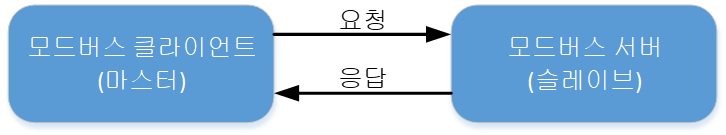

+ 모드버스 패킷의 구조

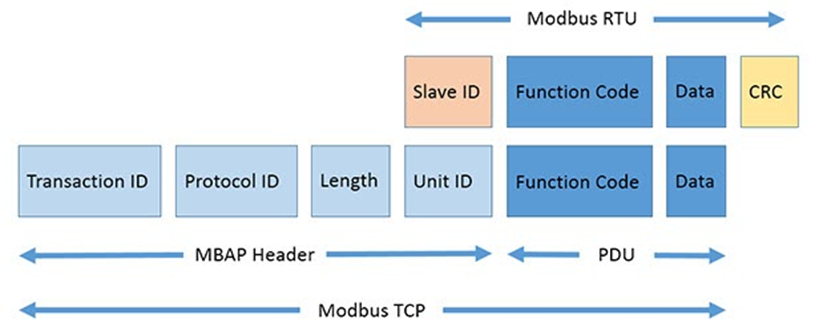
  + Transaction ID(2바이트): 패킷의 일련 번호
  + Protocol ID(2바이트): 항상 00 00
  + Length(2바이트): Unit ID부터 Data 필드까지의 길이(바이트 단위)
  + Unit ID(1바이트): 직렬 버스에 연결된 장치 식별 ID
  + Function Code(1바이트): 슬레이브가 수행할 동작. Code에 따라 구성이 달라짐
  + Data(n 바이트): 전송 정보

Function Code = 03의 패킷 구조  
  
다중 레지스터를 읽기 위한 요청 패킷(PDU)  
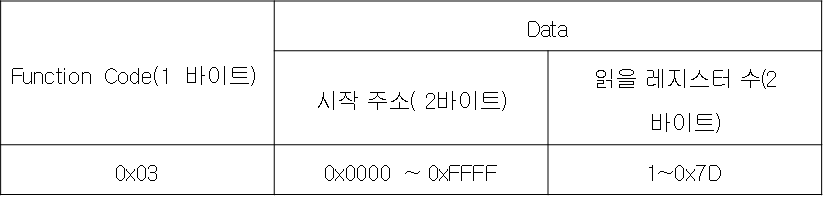

예: 108(0x6C)~110(0x6E) 주소의 레지스터를 읽기 위한 요청 패킷(PDU)  
패킷의 시작 주소는 (실제 시작 주소 - 1)이다 
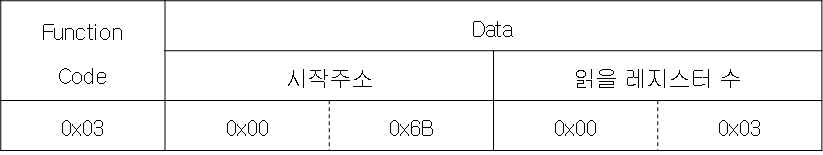

요청 패킷에 대한 응답 패킷 구조(PDU)

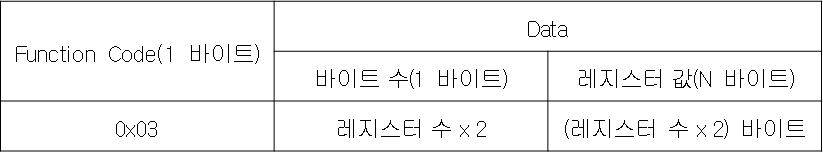

예제 요청 패킷에 대한 응답 패킷(PDU)

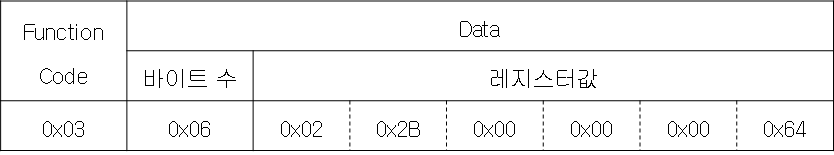

### 모드버스 슬레이브(서버) 프로그램

+ 마스터로부터 Function Code 0x03 또는 0x06 패킷을 받아 응답을 전송하는 슬레이브 프로그램
+ 패킷의 각 영역을 바이트로 나타내기 위해 struct.pack() 함수를 사용  
```
# 파이썬 데이터를 format에서 지정하는 형식으로 변환하는 함수
struct.pack("format", var1, var2, ...)
```
  + 정수를 한 바이트로 변환하는 형식지정 문자: 'B'
  + 정수를 두 바이트로 변환하는 형식지정 문자: 'H'
  + 모드버스의 빅엔디안 방식을 지정하는 형식지정 문자: '>'  
    value = struct.pack('>HB', transaction ID, Function Coed)   
    
    
+ 바이트값을 파이썬 데이터형으로 변환하려면 struct.unpack() 함수 사용

In [ ]:
#modbus-slave.py
import socket as so
import struct
from random import randint

sock = so.socket()
addr = ('', 502) #Modbus TCP는 502 포트 사용
sock.bind(addr)
sock.listen()
client, adr = sock.accept()

In [ ]:
# 수신(요청) 패킷 분해
while True:
    packet = client.recv(1024) # master packet 수신
    print("요청 패킷")
    
    #수신 패킷의 값을 16진수 두 자리로 표현
    for e in packet:
        print("{:02x}".format(e), end=' ')
    
    #수신 패킷에서 각 영역의 값을 분리하여 파이썬 데이터형으로 표현
    #Tr, Pr, Le, Addr, Reg = 두 바이트
    #ID, Code = 한 바이트
    Tr, Pr, Le, ID, Code, Addr, Reg = struct.unpack(">HHHBBHH", packet)
    print("\nTransaction ID=", Tr)
    print("Protocol ID=", Pr)
    print("Length=", Le)
    print("Unit ID=", ID)
    print("Function Code=", Code)
    print("Starting Address=", Addr)

In [ ]:
    #Function Code=3에 대한 응답 패킷 구성
    # 0x03 패킷: 슬레이브의 데이터를 요청하는 패킷
    if Code == 0x03: 
        print("Number of registers=", Reg)
        #임의의 데이터 준비
        data = bytes()
        
        #레지스터 길이 만큼의 데이터(2바이트) 준비
        #데이터 길이 = 레지스터 길이 x 2
        for i in range(Reg):
            data = data + struct.pack(">H", randint(0,255))
        
        # 응답 패킷의 길이 영역 계산
        Le = len(data)+3 
        
        # 응답 패킷 구성
        #Tr, Pr, ID, Code는 요청 패킷과 동일
        resp = struct.pack(">HHHBBB", Tr, Pr, Le, ID, Code, Reg*2) + data
    

In [ ]:
    #Function Code=06에 대한 응답 패킷 구성(요청 패킷과 동일)
    #0x06 패킷: 슬레이브로 데이터를 전송하는 패킷
    elif Code == 0x06: # master 데이터 저장
        #레지스터 값을 출력
        print("Register value=", Reg)
        #응답 패킷 = 요청 패킷
        resp = packet
    
    # 응답 전송
    client.send(resp)
    print("응답 패킷")
    #응답 패킷을 화면에 출력
    for e in resp:
        print("{:02x}".format(e), end=' ')

[실행 방법 1]  
Witte Software의 Modbus Poll 마스터 시뮬레이터(https://www.modbustools.com/modbus_poll.html)를 사용하여 동작을 확인할 수 있다. 시뮬레이터에서 0x03 패킷을 이용하여 슬레이브에게 0x0000 번지부터 10개의 값을 요청한다. 슬레이브 프로그램을 먼저 실행하고 Modbus Poll 시뮬레이터에서 요청 패킷을 전송한다. 슬레이브가 임의로 전송한 데이터를 시뮬레이터 화면에서 확인해 보자

<0x03 패킷의 마스터 화면>  
Setup > Read/Write Definition > Function : 03  
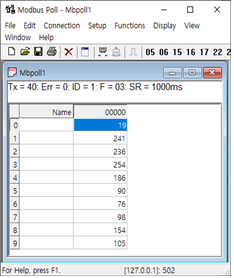  

[실행 방법 2]  
시뮬레이터에서 0x06 패킷을 이용하여 슬레이브 0x0000 번지에 3을 저장하는 요청 패킷을 보냈을 때 슬레이브 프로그램에 수신한 내용을 확인해 보자

<0x06 패킷의 마스터 화면>  
Setup > Read/Write Definition > Function : 06  
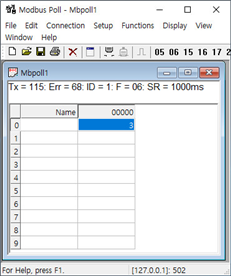

<슬레이브 응답 화면>  
  요청 패킷  
  00 ec 00 00 00 06 01 06 00 00 00 03  
  Transaction ID= 236  
  Protocol ID= 0  
  Length= 6  
  Unit ID= 1  
  Function Code= 6  
  Starting Address= 0  
  Register value= 3  
  응답 패킷  
  00 ec 00 00 00 06 01 06 00 00 00 03   

[연습문제 11-9], modbus-master.py    
Witte Software의 슬레이브 시뮬레이터 https://www.modbustools.com/modbus_slave.html
(Modbus Slave)를 이용하여, Function Code 0x03 패킷을 이용하여 시작번지 0x0000부터 10개의 레지스터 값을 요청하거나, Function Code 0x06 패킷을 이용하여 0x0000번지에 저장할 데이터 55를 전송하는 마스터 프로그램을 작성하라. Witte Software의 슬레이브 시뮬레이터는 Function Code 0x03과 0x06을 모두 0x03으로 설정한다.

## 프레임 파싱 프로그램

+ 사용자 메시지를 5문자씩 나누어 프레임을 구성하고 구성된 프레임을 에코 서버로 전송   
+ 에코 서버가 되돌려 보낸 프레임을 파싱하여 원래의 메시지를 복구
+ capsule.py 프로그램을 모듈로 사용
+ 소켓을 블로킹 모드로 설정하고 타임아웃을 0.1초로 지정

In [ ]:
#frame_parsing.py
#프레임 생성과 파싱 프로그램
import socket
import capsule #프레임 구성 사용자 모듈

SIZE = 5 #페이로드 크기
sock = socket.socket() #TCP 소켓
sock.setblocking(True) #블록킹 모드
sock.settimeout(0.1) #타임아웃=0.1
sock.connect(('localhost', 2500)) #서버 연결

In [ ]:
#header 구성
header = {"START": 0x05, "ADDR": 1, "NO": 1, "LENGTH": SIZE}
header_size = 11 #시작문자:1, 주소: 2, 순서번호: 4, 길이: 4

frame_seq="" #전송 프레임
msg = "hello world"
print("전송 메시지: ", msg)

#프레임 구성
for i in range(0, len(msg), SIZE):
    start = i
    frame_seq += capsule.frame(header["START"], header["ADDR"],
                               header["NO"], msg[start:start+SIZE])
    start += SIZE
    #순서번호 증가
    header["NO"] += 1

sock.send(frame_seq.encode()) #복수의 프레임을 구성하여 전송

In [ ]:
#프레임은 받아 원래의 메시지 복구
r_msg = '' #수신 메시지
seq_num = 1

while True:
    try:
        #프레임이 시작되면 프레임 헤더 수신
        if sock.recv(1).decode() == chr(0x05): #프레임 시작?
            p_msg = sock.recv(header_size-1).decode() #header
            
            #순서번호가 맞으면 페이로드를 수신 메시지에 추가
            if int(p_msg[2:6]) == seq_num: #순서번호 확인
                payload_len = int(p_msg[-4:]) #payload 길이
                r_msg = r_msg + sock.recv(payload_len).decode() #메시지 구성
                seq_num += 1
    except:
        break

print("복원 메시지: ",r_msg)
sock.close()

[실행 방법]  
TCP_echoserver.py 서버 프로그램을 먼저 실행하고 frame_parsing.py 프로그램을 실행한다. 전송 메시지와 복원 메시지가 같은지 확인해 보자

# 브로드캐스팅 프로그램

+ 브로드캐스팅(Broadcasting)은 로컬 네트워크에 연결된 모든 호스트에게 메시지를 보내는 통신방식
+ 네트워크 대역폭을 적게 사용
+ 브로드캐스트 주소: "xxx.xxx.xxx.255" 또는 broadcast
+ 연결이 없으므로 UDP 소켓만 사용 가능(SOCK_DGRAM)
+ setsockopt(level, optname, value) 함수를 사용하여 소켓 옵션 설정  
  level = SOL_SOCKET  
  optname = SO_REUSEADDR(사용된 주소 재사용)  
  value = 1

## 브로드캐스팅 수신 프로그램

브로드캐스트 메시지를 수신하여 화면에 출력하는 프로그램  
+ 서버로 동작

In [ ]:
#broadcast_server.py
# 브로드캐스트 수신 프로그램

from socket import *

s = socket(AF_INET, SOCK_DGRAM)

#소켓 옵션 설정
s.setsockopt(SOL_SOCKET, SO_REUSEADDR, 1)
s.bind(('', 10000))

while True:
    msg, addr = s.recvfrom(1024)
    print(msg.decode())

## 브로드캐스팅 송신 프로그램

브로드캐스트 주소로 메시지를 송신하는 프로그램(방송용 프로그램)  
+ 클라이언트로 동작
+ 소켓 옵션: SO_REUSEADDR, SO_BROADCAST  
  SO_BROADCAST: 브로드캐스트 주소로 데이터 송수신 가능

In [ ]:
#broadcast_client.py
# 브로드캐스트 송신 프로그램

from socket import *
#addr = ('192.168.0.255',10000) # 브로드캐스트 주소
#'<broadcast>'를 브로드캐스트 주소로 사용 가능
addr = ('<broadcast>',10000) 

#브로드캐스팅을 위한 소켓 설정
s = socket(AF_INET, SOCK_DGRAM)
s.setsockopt(SOL_SOCKET, SO_REUSEADDR, 1)
s.setsockopt(SOL_SOCKET, SO_BROADCAST, 1)

while True:
    smsg = input('Broadcast Message: ')
    s.sendto(smsg.encode(), (addr)) #브로드캐스팅 메시지 전송

[실행 방법]  
브로드캐스팅 수신 프로그램을 두 번이상 실행하고, 송신 프로그램을 실행한다. 송신 프로그램에서 전송한 메시지가 모든 수신 프로그램에서 수신되는지 확인한다.

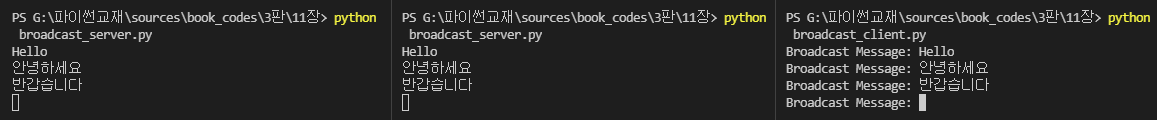

# 멀티캐스팅 프로그램

멀티캐스팅이란 한 번의 송신으로 메시지나 정보를 특정 그룹(멀티캐스트 그룹)에 속하는 여러 컴퓨터에 동시에 전송하는 방식  
+ 특정 IP 주소를 통하여 멀티캐스트 그룹에게 메시지 전송
+ 멀티캐스팅을 통해 데이터를 수신하려면 멀티캐스트 그룹에 가입되어 있어야 한다
+ 멀티캐스트 주소 범위(1110 0000 ~ 1110 1111): 224.0.0.0∼239.255.255.255
+ UDP 프로토콜 사용

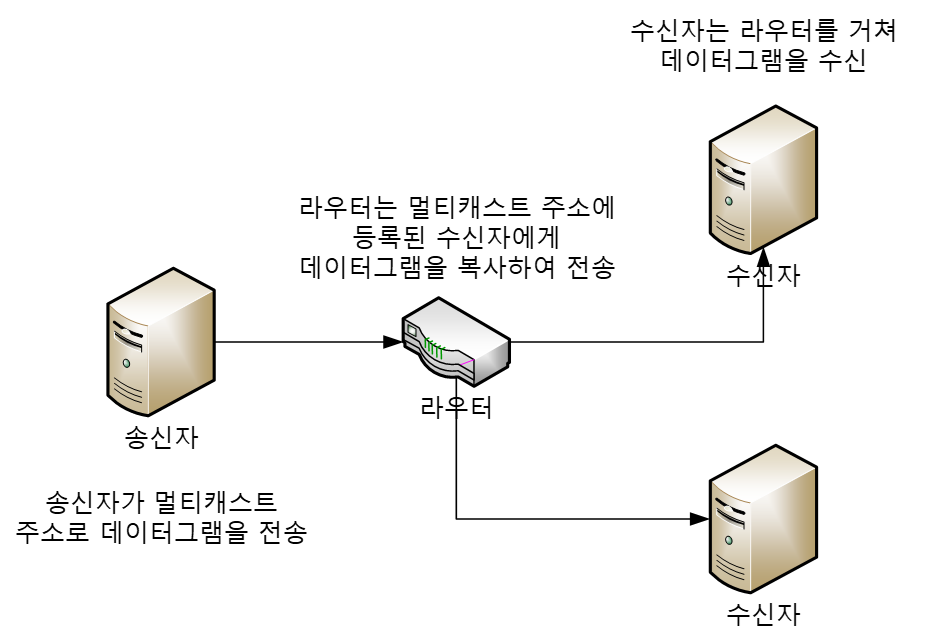

## 멀티캐스팅 송신 프로그램

+ UDP 소켓 아용
+ setsockopt(level, optname, value) 함수로 TTL(Time To Live) 옵션 설정
  + level = IPPROTO_IP, optname = IP_MULTICAST_TTL, value=TTL
  + TTL은 바이트형으로 표현  
  
```
from socket import *
s_sock = socket(AF_INET, SOCK_DGRAM)
TTL = struct.pack('B', 2)
s_sock.setsockopt(IPPROTO_IP, IP_MULTICAST_TTL, TTL)
```

In [ ]:
#multicast_send.py
#멀티캐스트 송신 프로그램

from socket import *
import struct

#그룹 주소 지정
group_addr = ("224.0.0.255", 5005) 

#UDP 소켓 사용
s_sock = socket(AF_INET, SOCK_DGRAM) 
#타임아웃=0.5초로 설정
s_sock.settimeout(0.5)

#TTL 설정(2바이트)
TTL = struct.pack('@B', 2) 
s_sock.setsockopt(IPPROTO_IP, IP_MULTICAST_TTL, TTL)

In [ ]:
while True:
    #멀티캐스트 메시지 전송
    rmsg = input('Your message: ')
    s_sock.sendto(rmsg.encode(), group_addr) 
    
    while True:
        #모든 수신자로부터 응답 수신
        try:
            response, addr = s_sock.recvfrom(1024)
        except timeout: #타임아웃 예외 발생
            break
        #응답 출력
        else:
            print('{} from {}'.format(response.decode(), addr)) 

## 멀티캐스팅 수신 프로그램

+ 소켓을 생성하고 멀티캐스트 그룹에 가입
+ 멀티캐스트 그룹 가입정보는 (그룹주소, INADDR_ANY)로 구성
  + 그룹 주소는 inet_aton() 함수를 이용하여 문자열 주소를 압축 32비트로 변환하고 struct.pack() 함수를 이용하여 이를 다시 4 바이트로 표시
  + INADDR_ANY는 빈 문자열이며 4 바이트로 표시
```
group_addr = ‘224.0.0.255’
mreq = struct.pack("4sl", inet_aton(group_addr), INADDR_ANY)
r_sock.setsockopt(IPPROTO_IP, IP_ADD_MEMBERSHIP, mreq)
```
+ 멀티캐스트 그룹 탈퇴

```
r_sock.setsockopt(IPPROTO_IP, IP_DROP_MEMBERSHIP, mreq) 
```

In [ ]:
#multicast_recv.py
#멀티캐스트 수신 프로그램

from socket import *
import struct

BUFFER = 1024

#그룹 주소
group_addr = "224.0.0.255" 
r_sock = socket(AF_INET, SOCK_DGRAM)
r_sock.setsockopt(SOL_SOCKET, SO_REUSEADDR, 1)
r_sock.bind(("", 5005))

#멀티캐스트 그룹 가입
mreq = struct.pack("4sl", inet_aton(group_addr), INADDR_ANY)
r_sock.setsockopt(IPPROTO_IP, IP_ADD_MEMBERSHIP, mreq) #멤버 가입
print("Ready to receive")

In [ ]:
#메시지를 수신하고 'ACK' 응답을 전송한다
while True:
    rmsg, addr = r_sock.recvfrom(BUFFER) #메시지 수신
    print("Received '{}' from ({}, {})".format(rmsg.decode(), *addr))
    r_sock.sendto('ACK'.encode(), addr) #ACK 전송

[실행 방법]  
VS Code에서 multicast_recv.py(수신 프로그램)을 먼저 실행하고, multicast_send.py(송신 프로그램)을 실행한다. 송신 프로그램에서 보낸 메시지가 수신 프로그램에서 정상적으로 수신하는지 확인한다

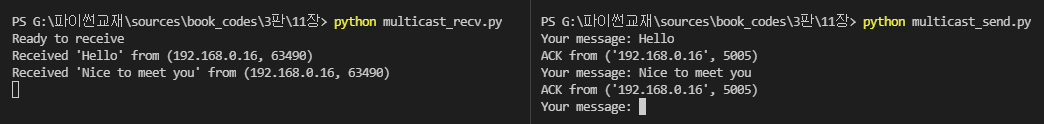